# Face Detection by MTCNN

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import sys
import detect_face
import numpy as np
import cv2
import tensorflow as tf
from scipy import misc
from PIL import Image as PImage

import menpo.io as mio
from menpo.shape import PointCloud
from menpo.visualize import print_progress
from menpo.image import Image
from menpo.transform import Translation, Scale
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
minsize = 40 # minimum size of face
threshold = [ 0.6, 0.7, 0.7 ]  # three steps's threshold
factor = 0.709 # scale factor

with tf.Graph().as_default():
    sess = tf.Session()
    with sess.as_default():
        pnet, rnet, onet = detect_face.create_detector(sess, './detection')

./detection/cas3.npy True


Box Number: 1


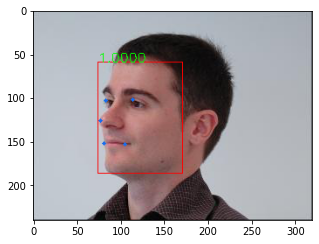

In [4]:
source_path = './image/ID01_004.jpg'
image =  mio.import_image(source_path)
bbox = image.landmarks['PTS'].bounding_box()
bmin, bmax = bbox.bounds()
bounding_boxes = np.array([[bbox.points[0][1], bbox.points[0][0], bbox.points[2][1], bbox.points[2][0], 1.]])
# 1 step box regression to simulate the variance of detector
bounding_boxes, points = detect_face.box_regression(image.pixels_with_channels_at_back() * 255, onet, bounding_boxes, 0.001)

print('Box Number: %s' % bounding_boxes.shape[0])

I = np.array(PImage.open(source_path))
canvas = I.copy()
for i in range(bounding_boxes.shape[0]):
    cv2.rectangle(canvas,(int(bounding_boxes[i][0]),int(bounding_boxes[i][1])),(int(bounding_boxes[i][2]),int(bounding_boxes[i][3])),(255,0,0))
    cv2.putText(canvas,'%.4f' % bounding_boxes[i][-1],(int(bounding_boxes[i][0]),int(bounding_boxes[i][1])),cv2.FONT_ITALIC,0.5,(0,255,0))
    for j in range(int(points.shape[0]/2)):
        cv2.circle(canvas, (int(points[j, i]), int(points[j+5, i])), 2, (24,109,238), -1)
        
plt.figure(figsize=(5,5))
plt.imshow(canvas)

Box Number: 31


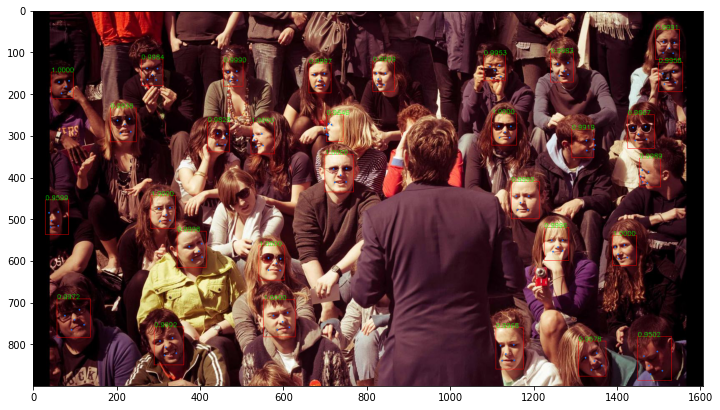

In [5]:
source_path = './image/test.jpg'
image =  mio.import_image(source_path)
# 3 step cascade detection 
bounding_boxes, points = detect_face.detect_face(image.pixels_with_channels_at_back() * 255, minsize, pnet, rnet, onet, threshold, factor)
print('Box Number: %s' % bounding_boxes.shape[0])
I = np.array(PImage.open(source_path))
canvas = I.copy()
for i in range(bounding_boxes.shape[0]):
    cv2.rectangle(canvas,(int(bounding_boxes[i][0]),int(bounding_boxes[i][1])),(int(bounding_boxes[i][2]),int(bounding_boxes[i][3])),(255,0,0))
    cv2.putText(canvas,'%.4f' % bounding_boxes[i][-1],(int(bounding_boxes[i][0]),int(bounding_boxes[i][1])),cv2.FONT_ITALIC,0.5,(0,255,0))
    for j in range(int(points.shape[0]/2)):
        cv2.circle(canvas, (int(points[j, i]), int(points[j+5, i])), 2, (24,109,238), -1)

# misc.imshow(canvas)
plt.figure(figsize=(12,12))
plt.imshow(canvas)